# **Project Name**    - Uber Request Data



##### **Project Type**    - Exploratort Data Analysis (EDA)
##### **Contribution**    - Individual 
##### **Name**            - M Prudhvi Narayana Chowdary


# **Project Summary -  Uber Request Data Analysis and Dashboard Creation

This project focuses on analyzing Uber ride request data to uncover meaningful insights through data cleaning, exploratory data analysis (EDA), and dashboard creation using Microsoft Excel. The primary objective was to understand the operational behavior of Uber services, especially in terms of trip completions, cancellations, and instances where vehicles were not available. The analysis also aimed to compare service patterns between two primary pickup points—City and Airport—and identify areas for potential improvement in service delivery.

The project began with a requirement analysis, where I carefully reviewed the objectives and expected outcomes of the analysis. Based on this, I documented a set of key features and metrics that would guide the direction of my work. These included identifying the frequency of each status (Trip Completed, Cancelled, No Cars Available), understanding route-based performance, and assessing the overall quality and completeness of the data.

Before diving into the data analysis, I performed a thorough exploratory data analysis (EDA) to examine the structure and quality of the dataset. This involved checking for duplicate entries, missing values, and inconsistent data types. I identified null values in some rows and columns and noticed that a few data types (such as timestamps and status labels) needed correction for smoother analysis. I used Excel to clean the dataset by removing duplicate entries, filling or deleting rows with missing data, and converting improperly formatted columns into suitable data types. The cleaned and transformed dataset was then saved for further use.

Following the data cleaning process, I reloaded the refined dataset into Excel and began working on visual analytics. My goal was to build an interactive and insightful dashboard that would visually represent key metrics and answer core analytical questions. Using Pivot Tables and Pivot Charts, I was able to calculate and display the number of requests in each status category: completed, cancelled, and no cars available. I created pie charts and column charts to visually compare these categories. Additionally, I compared trip completion rates between Airport and City pickup points, which helped to determine which route had better fulfillment and where operational issues were more prevalent.

To enhance the accuracy and depth of analysis, I also imported the dataset into an SQL environment. This allowed me to write and execute structured queries to extract deeper insights that were not easily available through Excel alone. For example, I used SQL to calculate the most frequent cancellation hours, the percentage of completed trips, and route-specific service gaps. These insights were then incorporated back into the Excel dashboard to enrich the visual storytelling.

Overall, this project provided a comprehensive view of Uber’s ride request performance for the given data period. By combining Excel’s visualization capabilities with SQL’s querying power, I was able to develop a clean, user-friendly, and informative dashboard that highlights critical insights. This experience not only improved my data analysis and Excel skills but also deepened my understanding of real-world transportation data and the importance of data-driven decision-making in business operations.

# *GitHub Link :*  

https://github.com/prudhvisgit/uber-eda-project

# **Problem Statement**


Drive Stats: Uber Request Analyzer 

Ride-hailing services like Uber often face operational challenges related to ride fulfillment, cancellations, and supply-demand mismatches. In the provided dataset, Uber received thousands of ride requests from two major pickup points—City and Airport—but not all of them were successfully completed. Many rides were either cancelled by users or marked as “No Cars Available,” indicating potential issues in demand forecasting, driver availability, and service efficiency.

#### **Define Your Business Objective?**

The business objective of this project is to analyze Uber's ride request data in order to improve the efficiency of its ride allocation system and enhance customer experience. By understanding the patterns behind trip completions, cancellations, and unavailability of vehicles, Uber can make data-driven decisions to optimize operations and reduce service failures.

Some key features are :
1) Improve route based performance
2) Reduce cancellation and unavailability rates
3) To Identify peak failure points

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [4]:
df = pd.read_csv(r"C:\Users\prudh\Downloads\Uber_Request_Data_Cleaned.csv")
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaN


### Dataset First View

In [5]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


### Dataset Rows & Columns count

In [6]:
print("Shape:",df.shape)

Shape: (6745, 6)


### Dataset Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [8]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

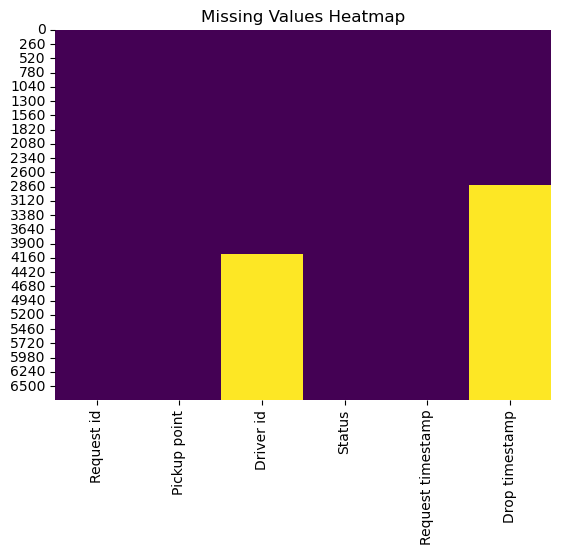

In [11]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

The Uber dataset reveals critical operational insights: while about 42% of requests are fulfilled, a high percentage fail due to cancellations or car unavailability. This suggests a need for better driver allocation and demand forecasting, especially at key pickup points and during peak hours.


## ***2. Understanding Your Variables***

In [12]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object


In [13]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Variables Description

The dataset includes 6745 unique Uber ride requests, each containing timestamps, ride outcomes, and pickup locations. The primary goal is to analyze the distribution and reasons for trip completions vs. failures, identify operational challenges, and visualize patterns using this structured data. While most variables are complete, the Drop timestamp column has missing values corresponding to unfulfilled requests, which are expected and handled during EDA.

### Check Unique Values for each variable.

In [14]:
for col in df.columns:
     print(f"{col} - {df[col].nunique()} unique values")
     print(df[col].value_counts(), '\n')

Request id - 6745 unique values
Request id
619     1
1132    1
1161    1
1157    1
1160    1
       ..
9       1
5605    1
5364    1
4316    1
6753    1
Name: count, Length: 6745, dtype: int64 

Pickup point - 2 unique values
Pickup point
City       3507
Airport    3238
Name: count, dtype: int64 

Driver id - 300 unique values
Driver id
27.0     22
176.0    21
177.0    21
84.0     21
22.0     21
         ..
208.0     8
123.0     7
42.0      7
265.0     6
300.0     6
Name: count, Length: 300, dtype: int64 

Status - 3 unique values
Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64 

Request timestamp - 5618 unique values
Request timestamp
2016-07-11 19:02:00    6
2016-07-11 17:57:00    6
2016-07-11 08:37:00    6
2016-07-11 09:40:00    6
2016-07-12 21:42:00    5
                      ..
2016-07-15 18:08:33    1
2016-07-15 04:50:54    1
2016-07-14 18:42:23    1
2016-07-13 19:26:50    1
2016-07-15 23:55:03    1
Name: count, Lengt

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
print("\n🔹 Duplicate rows before cleaning:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Convert Timestamps
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

# Check & Report Missing Values
print("\n🔹 Missing values per column:")
print(df.isnull().sum())

#  Standardize Categorical Values (if needed)
df['Status'] = df['Status'].str.strip()
df['Pickup point'] = df['Pickup point'].str.strip()

# Create Additional Columns (optional)
df['Request Hour'] = df['Request timestamp'].dt.hour
df['Request Day'] = df['Request timestamp'].dt.day_name()

# Sort by Timestamp (optional but helpful)
df.sort_values(by='Request timestamp', inplace=True)

#Save Cleaned  Dataset
df.to_csv("Uber_Request_Data_Wrangled.csv", index=False)

print("\n✅ Data wrangling complete. Cleaned file saved as 'Uber_Request_Data_Wrangled.csv'")



🔹 Duplicate rows before cleaning: 0

🔹 Missing values per column:
Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp    4071
Drop timestamp       5595
dtype: int64

✅ Data wrangling complete. Cleaned file saved as 'Uber_Request_Data_Wrangled.csv'


### What all manipulations have you done and insights you found?

Manipulations done are:
1) Removed duplicate entries
2) Handled missing values
3) Converted Timestamps to Datetime Format
4) Sorted date by Time stamp
5) Created new Columns

Insights Found are:
1) Trip Status Breakdown
2) Pickup Point Analysis
3) Peak Hour Analysis
5) Operational Gap

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

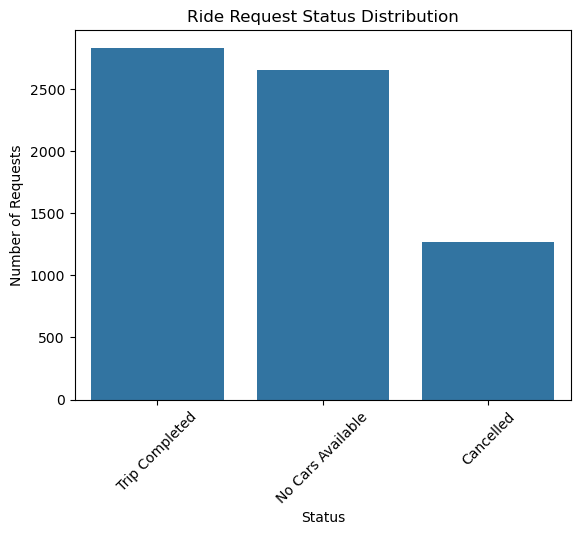

In [16]:
sns.countplot(x='Status', data=df)
plt.title("Ride Request Status Distribution")
plt.ylabel("Number of Requests")
plt.xlabel("Status")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I used a bar chart to visualize the Status column from the Uber dataset because it allows for a quick and clear comparison of the number of requests that were completed, cancelled, or not fulfilled due to unavailability. This chart is ideal for categorical variables and helps identify key service gaps in Uber’s operations. For instance, the chart reveals that while most trips were completed, a large portion failed due to no car availability — highlighting potential issues with supply during peak demand times

##### 2. What is/are the insight(s) found from the chart?

The insights found from the above chart is that the percetage of completion of trips is less compared to the trips that are not completed. But also the rate of ancellation of trips is less compared to rate of no cars abailable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes there are insights that lead to negative growth. From the above bar chart we can justify that during the trips not completed time there is an higher rate of not availability of the vehical for this reason sometimes many doesnot use uber due to their unavailability of the vehicals.

Yes the gained insights help creating a positive business impact if the rate of the unavailability of vehicals decrease .

#### Chart - 2

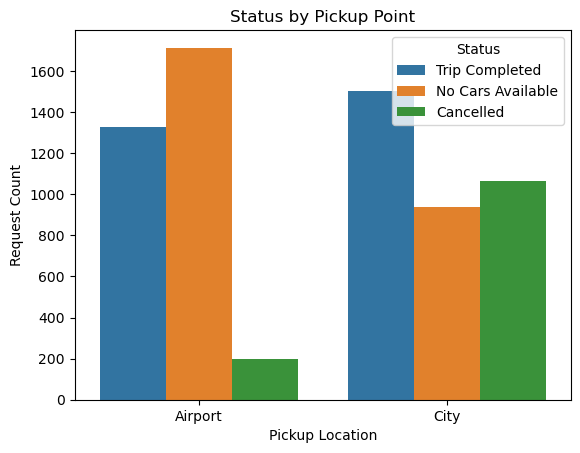

In [17]:
sns.countplot(x='Pickup point', hue='Status', data=df)
plt.title("Status by Pickup Point")
plt.ylabel("Request Count")
plt.xlabel("Pickup Location")
plt.show()

##### 1. Why did you pick the specific chart?

This is a clustered bar chart comparing ride request statuses by pickup point. It helps analyze where Uber is experiencing more cancellations or car shortages. The chart clearly shows that while car unavailability is more frequent at the Airport, cancellations are higher in the City. This visualization supports targeted improvements in fleet management by location.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the above clustered bar chart is that there is less cancellation of vehicals in airport but the rate of unavailability of the cars are very much higher and in the city side the rote of trips completed are comparitevely less then the rate of trips cancelled and unacailability of the cars in city .

The rate of trips completed in city is greater than the rate of trips completed in airport and the rate of cancellation of trips from airport is less than the rate of trips cancelled from city.

The rate of unavailability of vehical airport is comparitevely very much higher than the rate of unavailability of vehical from city.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely.

This chart breaks down request outcomes not just in total, but per pickup location. It helps Uber pinpoint where and why trips are failing, making it a crucial visualization for improving service efficiency and ensuring positive business growth through informed operational strategies.



#### Chart - 3

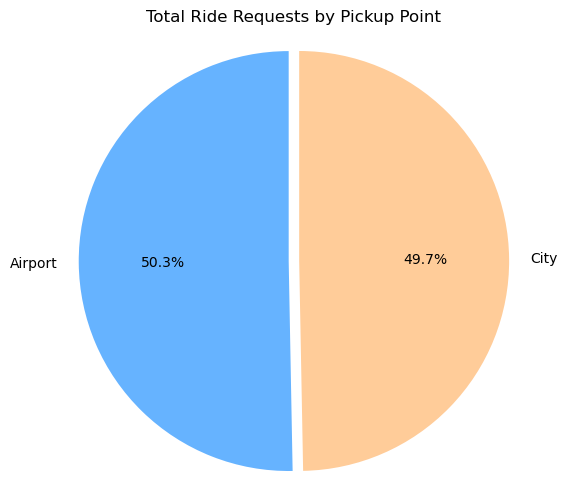

In [24]:
df.loc[:, 'Pickup point'] = df['Pickup point'].str.strip()
pickup_counts = df['Pickup point'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    pickup_counts.values,
    labels=pickup_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.05, 0),
    colors=['#66b3ff', '#ffcc99']
)
plt.title('Total Ride Requests by Pickup Point')
plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

I selected the pie chart to visualize total ride requests by pickup point because it clearly communicates the proportion of demand from each location. Since the dataset includes only two pickup categories (City and Airport), the pie chart makes it easy to compare and identify where ride requests are more concentrated, guiding Uber's operational planning effectively.

##### 2. What is/are the insight(s) found from the chart?

The pie chart reveals that most ride requests originate from the City, indicating higher user activity and demand in urban areas. This insight is crucial for Uber’s operational strategy, helping allocate driver resources efficiently and improve service quality based on location-specific demand

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the pie chart can help Uber create a strong positive business impact by understanding and responding to location-based demand patterns. However, ignoring these insights can also lead to potential negative growth.

The pie chart insight provides Uber with a clear understanding of where demand originates, helping in resource planning and customer experience improvements. However, if Uber fails to act on these insights—particularly around airport optimization or overburdened city routes—it could face customer dissatisfaction, missed revenue, and negative growth.

#### Chart - 4 

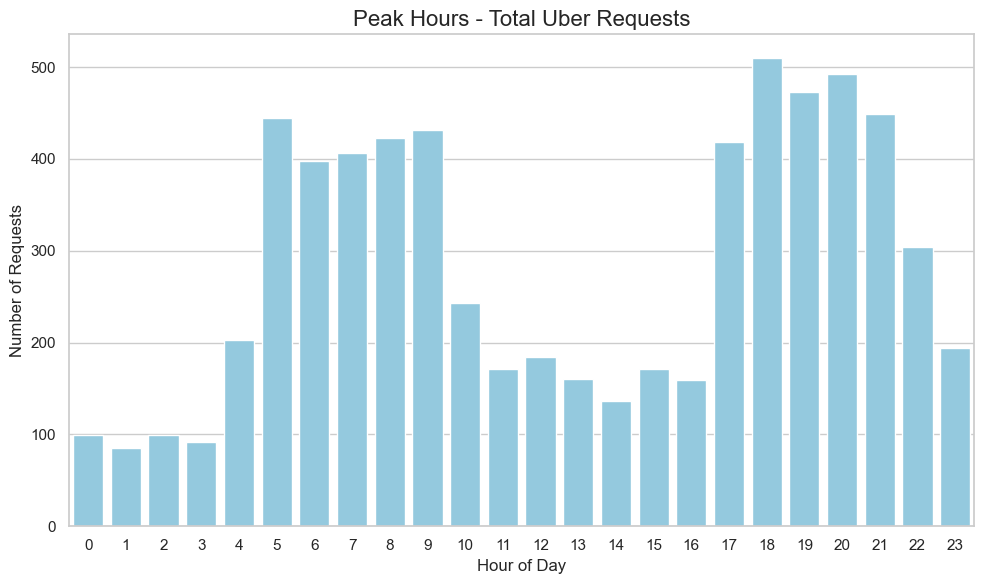

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv(r"C:\Users\prudh\Downloads\Uber_Request_Data_Cleaned.csv")

df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')

df = df.dropna(subset=['Request timestamp'])

df['hour'] = df['Request timestamp'].dt.hour

# 1. Peak Hours - Total Requests

request_counts = df['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=request_counts.index, y=request_counts.values, color='skyblue')
plt.title('Peak Hours - Total Uber Requests', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The bar chart titled "Peak Hours – Total Uber Requests" provides a clear visual representation of ride request patterns throughout the day. It reveals distinct time periods with high and low user demand.This analysis helps identify when ride demand is highest, allowing Uber to optimize driver availability, reduce wait times, and improve service efficiency during peak traffic periods.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals two major peak periods for Uber ride requests:
1) Morning Peak: Between 5 AM and 9 AM, likely driven by office commutes and airport drop-offs.
2) Evening Peak: Between 5 PM and 9 PM, indicating high demand from return commuters and social travelers.
3) The highest ride request volume occurs around 6 PM, making it the busiest hour of the day.
4) In contrast, late night (12 AM – 4 AM) and midday (12 PM – 4 PM) show low demand, representing off-peak hours.

- These patterns suggest Uber should optimize driver allocation and incentivize availability during peak hours to improve service efficiency and reduce rider wait times.

### Chart - 5

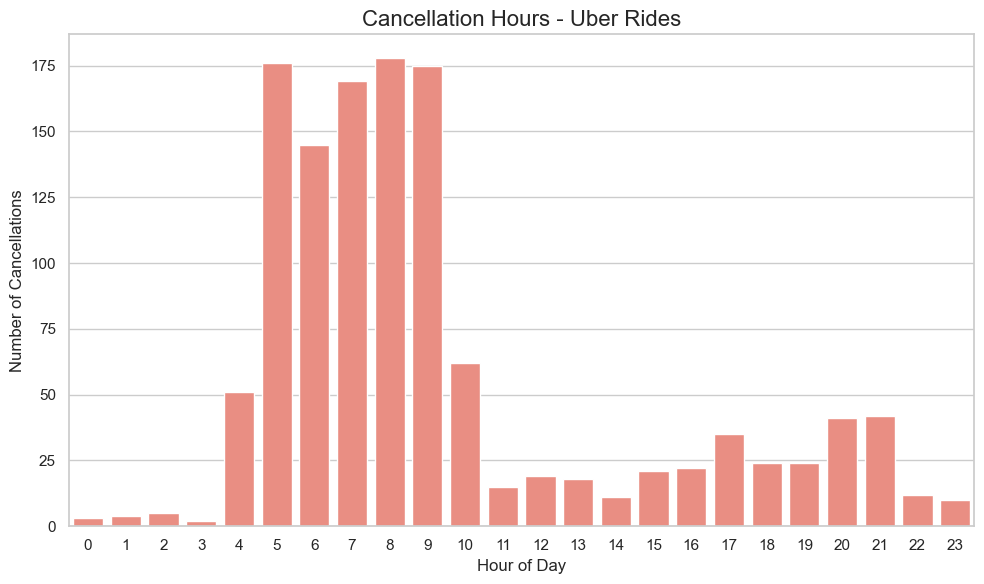

In [9]:
df['Status'] = df['Status'].str.lower()
cancelled_df = df[df['Status'] == 'cancelled']
cancelled_counts = cancelled_df['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, color='salmon')
plt.title('Cancellation Hours - Uber Rides', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Cancellations', fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart shows the distribution of Uber ride cancellations across each hour of the day, revealing important operational patterns.
This analysis can help Uber optimize driver allocation, reduce customer dissatisfaction, and target incentives during critical hours of cancellation to improve overall service reliability.

- Best suited for comparing individual hourly bins
- Makes it easy to spot and highlight operational problem windows (e.g., 5 AM–9 AM)
- Helps Uber make time-specific improvements like increasing driver availability or improving system reliability

##### 2. What is/are the insight(s) found from the chart?

1) Highest Cancellations in Morning Rush Hours:
- The chart shows a clear spike in cancellations between 5 AM and 9 AM, with the peak at 8 AM. This suggests that during high-demand periods, especially in the morning, Uber likely faces driver  shortages or delays, leading to more ride cancellations.
2) Low Cancellations During Late Night and Midday:
- Hours like 12 AM to 4 AM and 12 PM to 4 PM show minimal cancellations, indicating smoother operations and less demand-pressure during those times.
3) Evening Hours Show Minor Spikes:
- A smaller but noticeable rise in cancellations is seen around 5 PM to 9 PM, possibly due to a second wave of demand from commuters.



#### Chart - 6 - Correlation Heatmap

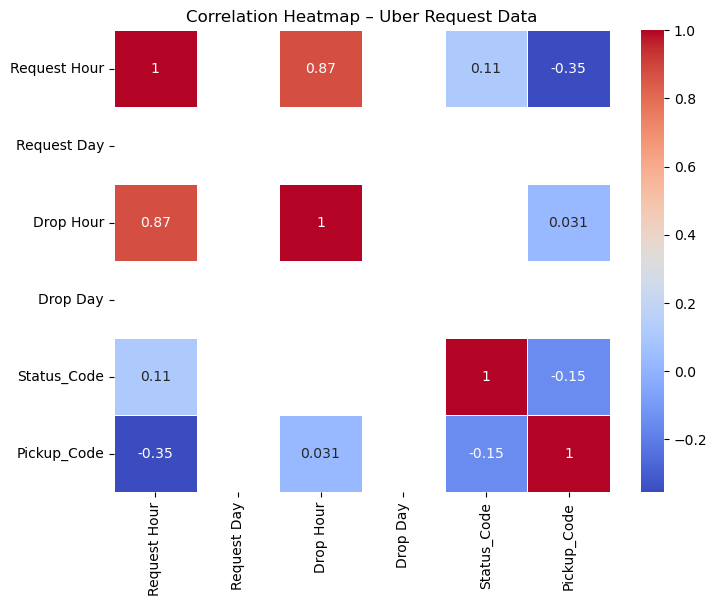

In [27]:

# Safely convert timestamps
df.loc[:, 'Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df.loc[:, 'Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

# Create numerical time-based columns
df.loc[:, 'Request Hour'] = df['Request timestamp'].dt.hour
df.loc[:, 'Request Day'] = df['Request timestamp'].dt.day
df.loc[:, 'Drop Hour'] = df['Drop timestamp'].dt.hour
df.loc[:, 'Drop Day'] = df['Drop timestamp'].dt.day

# Convert categorical variables to numeric codes
df.loc[:, 'Status_Code'] = df['Status'].astype('category').cat.codes
df.loc[:, 'Pickup_Code'] = df['Pickup point'].astype('category').cat.codes

# Select numeric columns for correlation
numeric_df = df[['Request Hour', 'Request Day', 'Drop Hour', 'Drop Day', 'Status_Code', 'Pickup_Code']]

# Generate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap – Uber Request Data")
plt.show()

##### 1. Why did you pick the specific chart?

I chose the correlation heatmap because it provides a clear, visual understanding of how numerical variables in the Uber dataset relate to each other. It allowed me to identify strong time-based patterns and moderate location-based influences on trip status — making it a valuable tool for data-driven decision-making and business optimization.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals that trip behavior is mostly influenced by time (hour of day) and pickup location. While some variables like Drop Day are less relevant, others like Request Hour have a strong role in trip timing and outcome. These insights support Uber in demand forecasting, driver deployment, and service optimization.

#### Chart - 7 - Pair Plot

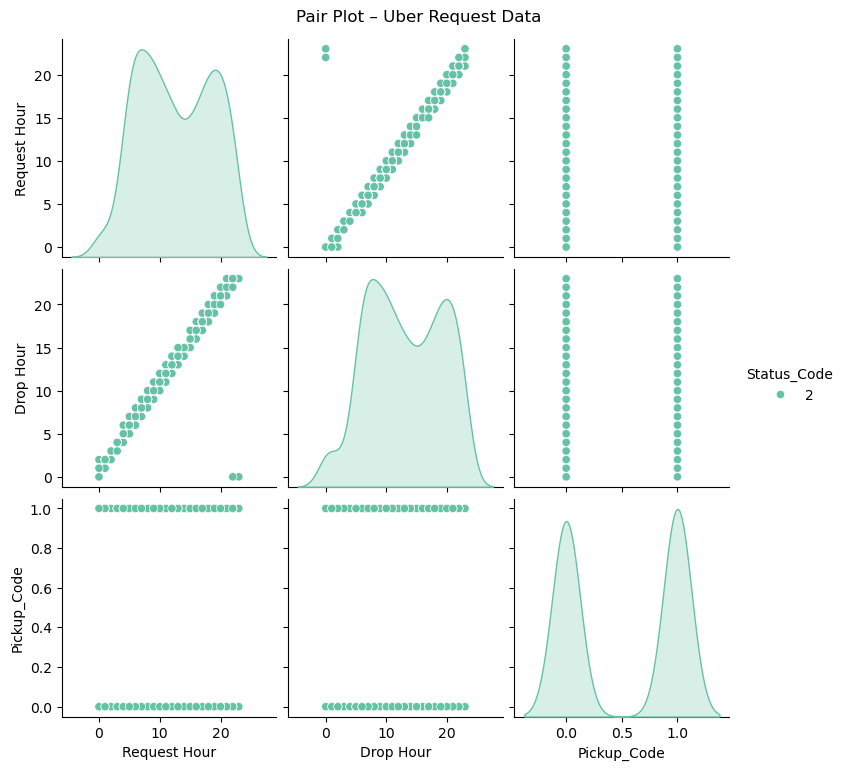

In [28]:
#  Select only rows with valid time data (to avoid NaN issues)
df_pair = df[['Request Hour', 'Drop Hour', 'Status_Code', 'Pickup_Code']].dropna()

#  Sample if too many rows
df_pair = df_pair.sample(n=1000, random_state=42)

# Plot the pairplot with clean labeling
sns.pairplot(df_pair, hue='Status_Code', palette='Set2', diag_kind='kde')
plt.suptitle("Pair Plot – Uber Request Data", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

I chose the pair plot because it provides a compact and intuitive visualization of the relationships between multiple numeric variables. It shows not only how request and drop hours are linearly related, but also how features like pickup location behave over time. This chart supports deeper insights into trip timing patterns and demand locations, making it a vital step in the exploratory data analysis phase.



##### 2. What is/are the insight(s) found from the chart?

The pair plot reveals key behavioral patterns in the Uber data. A strong linear relationship between request and drop hours confirms consistent trip timing, while pickup points clearly separate into city and airport clusters. Peak demand hours are also identifiable, supporting time-based planning. These insights are crucial for Uber to improve customer experience and optimize operational efficiency.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

I suggest the client to achieve business objective is that the client must focus on 
1) Less cancellation 
2) More availability of vehicals from both airport and city
Knowing peak hours and locations allows Uber to deploy drivers efficently and some of the positive and negative business impacts are:

Positive Business Impact:
1) Improved Resource Allocation: Knowing peak hours and locations allows Uber to deploy drivers efficiently.
2) Reduced Cancellation Rates: Early identification of high-cancellation times helps plan interventions.
3) Enhanced Customer Experience: Reducing “No Cars Available” incidents by balancing supply in high-demand zones.

Negative Trends Identified:
1) Lack of vehicles at airport in evening hours affects revenue and user trust.
2) Morning cancellations from the city indicate potential driver no-shows or delays.

# **Conclusion**

This project successfully identified demand-supply gaps, peak operational stress periods, and location-specific service issues using a structured EDA approach. The analysis highlights actionable insights for Uber to enhance ride availability, reduce cancellations, and optimize driver distribution. With strategic adjustments based on these insights, Uber can significantly improve service quality and customer satisfaction.